# Reading NWB files from Dandiset 000579: Two-photon calcium imaging of mouse posterior cortical areas during dynamic navigation decisions

---
This is the example notebook for reading the NWB files from the [Dandiset 000579: "Two-photon calcium imaging of mouse posterior cortical areas during dynamic navigation decisions.](https://dandiarchive.org/dandiset/000579/draft)" 

*Created by [Shih-Yi Tseng](https://github.com/sytseng) from the [Harvey Lab](https://harveylab.hms.harvard.edu/) at Harvard Medical School*

*Last updated: 7/21/2023*


#### Related publication
Tseng, S.Y., Chettih, S.N., Arlt, C., Barroso-Luque, R. and Harvey, C.D., 2022. Shared and specialized coding across posterior cortical areas for dynamic navigation decisions. Neuron, 110(15), pp.2484-2502. [DOI:10.1016/j.neuron.2022.05.012](https://www.sciencedirect.com/science/article/pii/S0896627322004536?via%3Dihub).

#### Dandiset description

The dataset contains calcium activity of >200,000 neurons recorded from 6 different cortical areas in mouse posterior cortex L2/3 and L5 using two-photon imaging, including V1 and secondary visual areas (AM and PM), retrosplenial cortex (RSC) and posterior parietal cortex (visA and MM), while the mice were performing a flexible decision-making task based on rule-switching during virtual navigation. There are total 300 behavior + imaging sessions collected from 8 mice. The neurons in each experiment have been registered into the Allen Institute Mouse Common Coordinate Framework (CCF) based on widefield retinotopy. In addition, these neurons contain fluorescent labels of retroAAV injected in one of the two sets of projection targets: an anterior part of anterior cingulate cortex/secondary motor cortex (ACC/M2) and striatum, or a posterior part of ACC/M2 and orbitofrontal cortex (OFC). 

#### Task description
The mouse ran down a virtual Y-maze and used visual cues on the wall to guide its choice into one of the two maze arms. After the reaching the end of the arm, the mouse was presented with a feedback delay, followed by a visual feedback indicating the correctness of its choice, and then received reward for correct trials or entered inter-trial intervals for incorrect trials (shown in **B**). The rewarded associations between cue and choice are determined by two rules (rule A or rule B as indicated in **A**), and the rule swicthed in blocks of 100-175 trials without explicit signaling multiple times within a single session. The mouse's performance usually dropped below chance level (fraction correct < 0.5) and recovered to expert level after 30-50 trials after rule switches (shown in **C**).

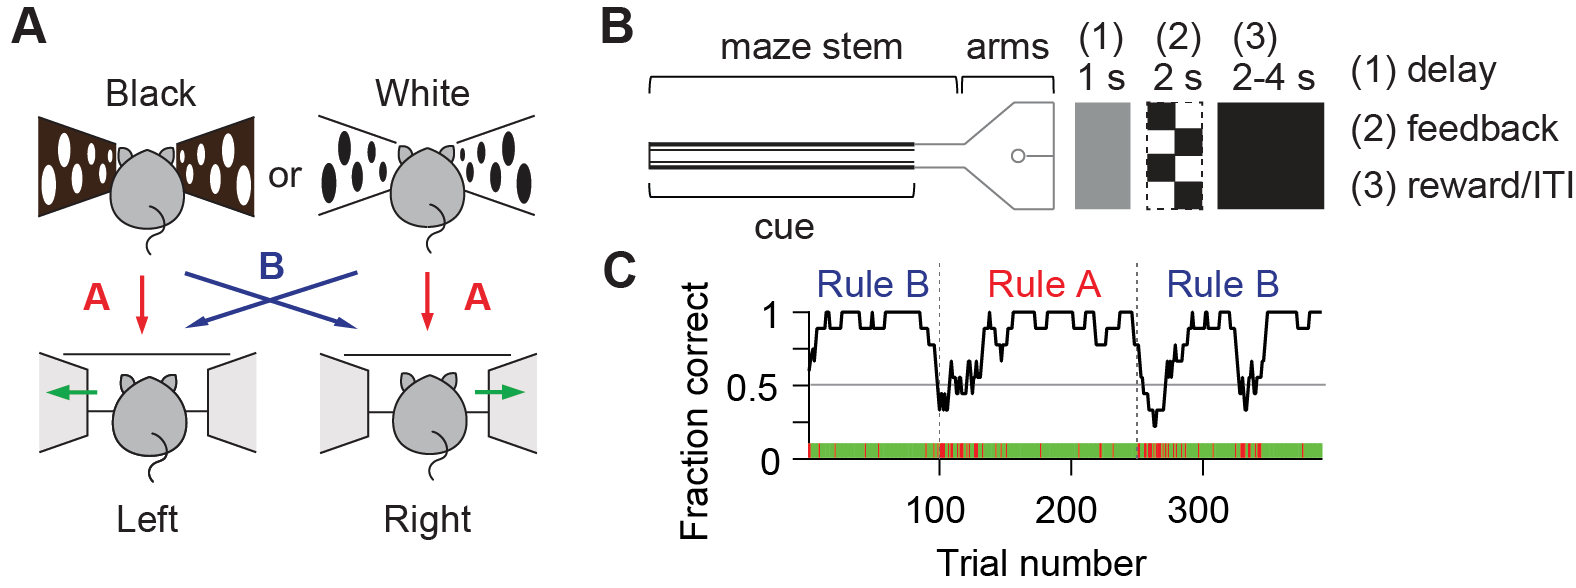

The two following sections describe how to read, extract and visualize information in the two types of NWB files in the Dandiset: *single session NWB files with behavior + ophys* in **Section A** and mouse-specific *NWB files with widefield retinotopy and two-photon overview images* in **Section B**.

# Section A: Read single session NWB file (behavior+ophys)

This section describes how to read and extract information contained in the single session NWB files with behavior + ophys, as well as some basic visualization of the data.

## Install NWB extnesion for custom lab meta data

First of all, install the NWB extnesion for custom lab meta data from here: https://github.com/sytseng/ndx-harvey-swac and install it in your environment, or call

`pip install git+https://github.com/sytseng/ndx-harvey-swac.git`

Load libaries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pynwb import NWBHDF5IO
from ndx_harvey_swac import LabMetaDataSession

## Download an example NWB file

Download the NWB file from DANDI dataset (https://dandiarchive.org/dandiset/000579/draft). For example, download the session file for mouse 9 session date 2017/08/19 (*sub-9_ses-mouse-9-session-date-2017-08-19-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb*). You can download it directly from the DANDI website, or use DANDI CLI in the command line window:

`dandi download https://api.dandiarchive.org/api/assets/74ac947f-fb79-4e44-ac18-bad485bf7d22/download/`

In [2]:
# specify the file path in your local file system (PLEASE CHANGE THIS!)
filepath = 'Z:\\HarveyLab\\Tier1\\Shih_Yi\\dandiset\\000579\\sub-9\\sub-9_ses-mouse-9-session-date-2017-08-19-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb'

## Read the NWB file 
Call the `NWBHDF5IO.read()` method to read the NWB data into an `NWBFile` object. Print the `NWBFile` object to inspect its contents.

In [3]:
# read and examine the NWB file
io = NWBHDF5IO(filepath, 'r')
nwb = io.read()
nwb

root pynwb.file.NWBFile at 0x2172584498448
Fields:
  acquisition: {
    Virmen_forward_lateral_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_maze_world_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_positions <class 'pynwb.behavior.Position'>,
    Virmen_reward_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_trial_number_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_trial_phase_timeseries <class 'pynwb.base.TimeSeries'>,
    imaging_frame_timeseries <class 'pynwb.base.TimeSeries'>,
    lick_timeseries <class 'pynwb.base.TimeSeries'>,
    raw_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
    virmen_frame_timeseries <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Mouse performing a dynamic navigation task with calcium imaging in visA layer 2/3
  experimenter: ['Tseng, Shih-Yi']
  file_create_date: [dat

### Examine session information

In [4]:
# examine session information
nwb.experiment_description, nwb.session_id

('Mouse performing a dynamic navigation task with calcium imaging in visA layer 2/3',
 'mouse_9_session_date_2017-08-19_area_visA_L23_multi_plane_imaging')

### Examine subject information

In [5]:
# examine the subject info
nwb.subject

subject pynwb.file.Subject at 0x2172584415120
Fields:
  age__reference: birth
  date_of_birth: 2017-03-01 00:00:00-05:00
  description: Mouse 9 Askin, date of arrival 2017-04-26 (~8 weeks old; date of birth is approximated), training started on 2017-06-01
  genotype: wildtype
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: 9

### Examine surgery and virus information

In [6]:
# examine the surgery and virus info
nwb.surgery, nwb.virus

('cranial window creation date:2017-05-25, 3.5 mm diameter, left posterior cortex; AAVretro injection date:2017-05-25; GCaMP6s injection date:2017-07-26; performed by Shih-Yi Tseng and Selmaan N. Chettih',
 'AAV2/1-synapsin-GCaMP6s-WPRE-SV40 in left V1 x2 sites, PM x1, AM x1, MM x1, RSC x1, visA x2, 1/10 dilution, 70nl per site in L23 and 100nl per site in L5; AAV2retro-Syn-mTagBFP2 in left posterior ACC/M2 x4, undiluted, 300 nl per site, coordinate (mm from bregma): (0, L 0.35, D 0.4), (0, L 0.35, D 0.8), (0, L 0.7, D 0.3), (0, L 0.7, D 0.8); AAV2retro-Syn-mScarlet in left ORBvl x1, ORBl x1, 1/5 dilution, 500 nl per site, coordinate (mm from bregma): (A 2.65, L 0.85, D 1.8), (A 2.6, L 1.35, D 1.75)')

This mouse was implanted with a 3.5 mm craniel window over left posterior cortex. GCaMP6s was injected into 6 areas: V1, PM, AM, MM, RSC, A. In addition, these neurons contained retrograde fluorecent labels through AAVretro injection: mTagBFP2 for posterior ACC/M2 projecting neurons, and mScarlet for OFC projecting neurons. 

The information about AAVretro injuection sites can be found in the `lab_meta_data` (session-specific) as well:

In [7]:
# examine the AAVretro injection site for mTagBFP2
nwb.lab_meta_data['harvey_lab_swac_metadata_session'].AAVretroInjSite__mTagBFP2

'posterior_ACC_M2'

In [8]:
# examine the AAVretro injection site for mScarlet
nwb.lab_meta_data['harvey_lab_swac_metadata_session'].AAVretroInjSite__mScarlet

'OFC'

### Lab meta data

One can take a look at other data in the `lab_meta_data`. It contains information for **AAVretroInjSite**, **Imaging**, **Registration**, and **TaskParam**. Some of these would become useful in the later section.

In [9]:
# examine the lab meta data
nwb.lab_meta_data['harvey_lab_swac_metadata_session']

harvey_lab_swac_metadata_session abc.LabMetaDataSession at 0x2172585341968
Fields:
  AAVretroInjSite__mScarlet: OFC
  AAVretroInjSite__mTagBFP2: posterior_ACC_M2
  Imaging__cortical_layer: 2/3
  Imaging__imaging_type: multi-plane
  Imaging__num_of_frame_per_volume: 5
  Imaging__num_of_imaging_plane: 4
  Registration__fov_center_ap_ccf_mm: -1.65221
  Registration__fov_center_area: visA
  Registration__fov_center_ml_ccf_mm: -1.49755
  Registration__fov_depth_mm: 0.115
  Registration__fov_plane_step_size_mm: 0.025
  Registration__fov_to_ccf_transformation_matrix: [[-1.28091964e-04 -1.46927372e-03 -1.08862203e+00]
 [ 1.33139914e-03 -1.40467401e-04 -1.95708382e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
  TaskParam__choice_bias_penalty: 0.0
  TaskParam__cue_delay_length: 10.0
  TaskParam__feedback_delay_sec: 1.0
  TaskParam__frac_non_visually_guided_trials: 0.8
  TaskParam__initial_rule: B
  TaskParam__iti_correct_sec: 2.0
  TaskParam__iti_incorrect_sec: 4.0
  TaskParam__max_po

## Acquisition

The file contains two types of raw data in its `acquisition` module: raw timeseries data output by the Virmen (virtual reality software) and raw timeseries data output by the Wavesurfer (synchronization signals).

**Note that the acquisition module contained raw behavioral data sampled at its original sampling rate. For the purpose of analyzing neural data w.r.t. the behavior, one should use the processed behavior data in the Behavior Processing Module which contains the processed behavioral data aligned to the two-photon imaging frames, such as "frame aligned" positions, velocities, trial number and other variables.**

In [10]:
# examine contents of the acquisition 
nwb.acquisition

{'Virmen_forward_lateral_velocity_timeseries': Virmen_forward_lateral_velocity_timeseries pynwb.base.TimeSeries at 0x2171778044368
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (283652, 2), type "<f8">
   description: Raw forward and lateral velocity (in maze) in Virmen frames (sampled at ~30 Hz)
   interval: 1
   offset: 0.0
   resolution: -1.0
   timestamps: Virmen_forward_lateral_positions pynwb.behavior.SpatialSeries at 0x2172584449680
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (283652, 2), type "<f8">
   description: Raw forward and lateral position in Virmen frames (sampled at ~30 Hz)
   interval: 1
   offset: 0.0
   reference_frame: (0, 0) is the start point (centered) of the maze stem
   resolution: -1.0
   timestamp_link: (
     Virmen_forward_lateral_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_maze_world_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_reward

### Raw data output by the Virmen 
Sampled at ~30 Hz, see `timestamps` for specific timepoints:
- **Virmen_positions**: Position object that contains the SpatialSeries for forward and lateral positions in the visual world (virtual maze)
- **Virmen_forward_lateral_velocity_timeseries**: Timeseires for forward and lateral velocities in the visual world (virtual maze)
- **Virmen_trial_number_timeseries**: Timeseires for  trial number of each timepoint, starting from trial 0
- **Virmen_trial_phase_timeseries**: Timeseires for indicator of trial phase for each timepoint, 0: maze, -1: feedback delay/feedback, -2: visual feedback onset, 1: ITI
- **Virmen_maze_world_timeseries**: Timeseires for maze world for each timepoint, 1:WLV, 2:BRV, 3:WRV, 4:BLV, 5:WLN, 6:BRN, 7:WRN, 8:BLN (B/W:black/white cue, L/R:left/right reward location, V/N:visually-guided/normal trial)
- **Virmen_reward_timeseries**: Timeseires for indicator of reward delivery (bool)

For example, let's take a look at the positions in the virtual maze. It is a `Position` object that contains the `SpatialSeries` for forward and lateral positions in the maze. 

In [11]:
# view content of the position
nwb.acquisition['Virmen_positions'], nwb.acquisition['Virmen_positions']['Virmen_forward_lateral_positions']

(Virmen_positions pynwb.behavior.Position at 0x2172603142608
 Fields:
   spatial_series: {
     Virmen_forward_lateral_positions <class 'pynwb.behavior.SpatialSeries'>
   },
 Virmen_forward_lateral_positions pynwb.behavior.SpatialSeries at 0x2172584449680
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (283652, 2), type "<f8">
   description: Raw forward and lateral position in Virmen frames (sampled at ~30 Hz)
   interval: 1
   offset: 0.0
   reference_frame: (0, 0) is the start point (centered) of the maze stem
   resolution: -1.0
   timestamp_link: (
     Virmen_forward_lateral_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_maze_world_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_reward_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_trial_number_timeseries <class 'pynwb.base.TimeSeries'>,
     Virmen_trial_phase_timeseries <class 'pynwb.base.TimeSeries'>
   )
   timestamps: <HDF5 dataset "timestamps": sha

In [12]:
# extract position data and timestamps 
virmen_positions = nwb.acquisition['Virmen_positions']['Virmen_forward_lateral_positions'].data[:]
virmen_timestamps = nwb.acquisition['Virmen_positions']['Virmen_forward_lateral_positions'].timestamps[:]

virmen_positions.shape, virmen_timestamps.shape

((283652, 2), (283652,))

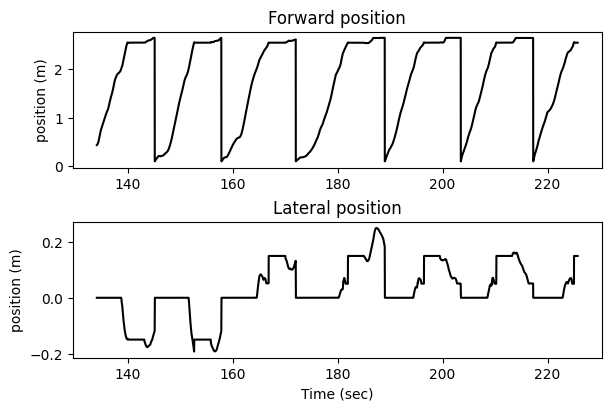

In [13]:
# plot a portion of position data
t_start = 5000
t_end = 10000
fig, ax = plt.subplots(2,1,figsize=(6,4), constrained_layout=True)
ax[0].plot(virmen_timestamps[t_start:t_end], virmen_positions[t_start:t_end,0],'k')
ax[0].set(ylabel='position (m)', title='Forward position')
ax[1].plot(virmen_timestamps[t_start:t_end], virmen_positions[t_start:t_end,1],'k')
ax[1].set(xlabel='Time (sec)', ylabel='position (m)', title='Lateral position');

### Raw data output by the Wavesurfer
This refers to the synchronization signals for the session as the following, regularly sampled at 2000 Hz:

- **raw_velocity_timeseries**: raw velocity of the spherical treadmill ("ball velocity or running velocity"), array of the shape: timestamps x [pitch, roll, yaw]; directionality for roll: positive is left
- **imaging_frame_timeseries**: imaging frame signal sent from two-photon microscope, corresponds to the timestamps of the two photon ophys data
- **virmen_frame_timeseries**: Virmen frame signal, corresponds to the timestamps of the Virmen acquisition data
- **lick_timeseries**: analog signal from the lick sensor; some sessions have signal loss due to acquisition problems, so it is not a reliable signal

For example, let's take a look at the velocities of the spherical treadmill:

In [14]:
# view content of the raw velocity
nwb.acquisition['raw_velocity_timeseries']

raw_velocity_timeseries pynwb.base.TimeSeries at 0x2172603256464
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10865091, 3), type "<i2">
  description: Raw velocity of the spherical treadmill sampled at 2000 Hz, array of the shape: timestampes x [pitch, roll, yaw]
  offset: 0.0
  rate: 2000.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: A.U.

In [15]:
# extract data from the raw velocity
ball_velocities = nwb.acquisition['raw_velocity_timeseries'].data[:]
sampling_rate = nwb.acquisition['raw_velocity_timeseries'].rate

ball_velocities.shape, sampling_rate

((10865091, 3), 2000.0)

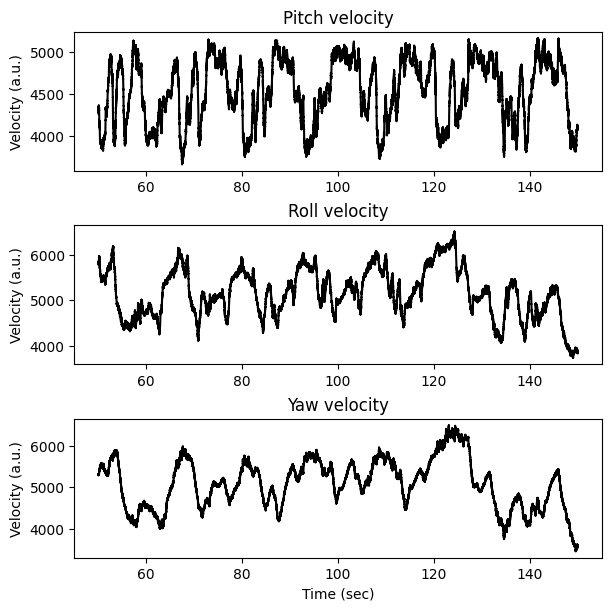

In [16]:
# plot a portion of velocity data
t_start = 100000
t_end = 300000
vel_timestamps = np.arange(t_start, t_end)/sampling_rate
fig, ax = plt.subplots(3,1,figsize=(6,6), constrained_layout=True)
ax[0].plot(vel_timestamps, ball_velocities[t_start:t_end,0],'k')
ax[0].set(ylabel='Velocity (a.u.)', title='Pitch velocity')
ax[1].plot(vel_timestamps, ball_velocities[t_start:t_end,1],'k')
ax[1].set(ylabel='Velocity (a.u.)', title='Roll velocity')
ax[2].plot(vel_timestamps, ball_velocities[t_start:t_end,2],'k')
ax[2].set(xlabel='Time (sec)', ylabel='Velocity (a.u.)', title='Yaw velocity');

## Trial information

The trial table contains basic information about trials, including:

- **start_time**: start time of this trial from session onset in second
- **stop_time**: stop time of this trial from session onset in second
- **is_vis**: whether the trial was a visually guided trial
- **is_ruleA**: whether the trial happened during rule A; rule A: BL & WR, rule B: WL & BR
- **is_switch**: whether a rule switch happened on the trial
- **is_cueB**: whether the trial had a black cue; True: black, False: white
- **is_choL**: whether the mouse made a left choice on the trial; True: left, False: right
- **is_correct**: whether the trial was correct

In addition, you can also find information related to the strategy variable using trial history-based RNN models (see [Tseng et al. 2022](https://www.sciencedirect.com/science/article/pii/S0896627322004536?via%3Dihub) for modeling details and the interpretation of these variables:
- **association_mat**: behavioral LSTM predicted conditional probability; order: P(R|W), P(L|W), P(R|B), P(L|B)
- **rule_belief**: the rule belief on the trial; directionality: positive: rule B, negative: rule A
- **signed_bias**: the singed choice bias on the trial; directionality: positive: left bias, negative: right bias
- **rule_following**: the rule-following on the trial; values between -0.5 ~ 0.5
- **bias_following**: the bias-following on the trial; between -0.5 ~ 0.5
- **prob_actual_cho**: the probability of actual choice on the trial, i.e. P(actual choice|actual cue)

Other information:
- **trial_onset_plane_frame_idx**: for each imaging plane, the frame index for this trial's onset
- **trial_offset_plane_frame_idx**: for each imaging plane, the frame index for this trial's offset


Let's examine the trial table:

In [17]:
# convert trial table into dataframe and examine it
trial_df = nwb.trials.to_dataframe()
trial_df.head()

,start_time,stop_time,is_vis,is_ruleA,is_switch,is_cueB,is_choL,is_correct,association_mat,rule_belief,signed_bias,rule_following,bias_following,prob_actual_cho,trial_onset_plane_frame_idx,trial_offset_plane_frame_idx
id,,,,,,,,,,,,,,,,
0,30.16975,42.57175,False,False,False,False,True,True,"[0.6423881649971008, 0.35761183500289917, 0.68...",-0.039975,-0.324752,0.019988,-0.162376,0.357612,"[120, 120, 120, 120, 120]","[162, 162, 162, 162, 161]"
1,42.59525,62.52375,False,False,False,True,True,False,"[0.25210845470428467, 0.7478915452957153, 0.55...",-0.302109,0.193674,-0.151054,0.096837,0.445783,"[195, 195, 195, 194, 194]","[271, 271, 271, 271, 270]"
2,62.55600,76.31175,False,False,False,False,True,True,"[0.34659796953201294, 0.6534020304679871, 0.36...",-0.018400,0.288404,0.009200,0.144202,0.653402,"[315, 314, 314, 314, 314]","[365, 365, 364, 364, 364]"
3,76.33225,89.94225,False,False,False,False,True,True,"[0.17578017711639404, 0.8242198824882507, 0.37...",-0.200315,0.448125,0.100158,0.224062,0.824220,"[397, 397, 397, 397, 396]","[447, 446, 446, 446, 446]"
4,89.96525,102.28325,False,False,False,False,True,True,"[0.11006782203912735, 0.8899322152137756, 0.33...",-0.225436,0.554428,0.112718,0.277214,0.889932,"[479, 479, 479, 478, 478]","[521, 520, 520, 520, 520]"


Let's extract some information from the trial table.

In [18]:
# extract basic trial information
cueB = trial_df['is_cueB'].values.astype(int)
choL = trial_df['is_choL'].values.astype(int)
vis = trial_df['is_vis'].values.astype(int)
ruleA = trial_df['is_ruleA'].values.astype(int)
correctness = trial_df['is_correct'].values.astype(int)
switches = np.argwhere(trial_df['is_switch'].values).flatten()

We can make a plot of task performance over the session using moving average.

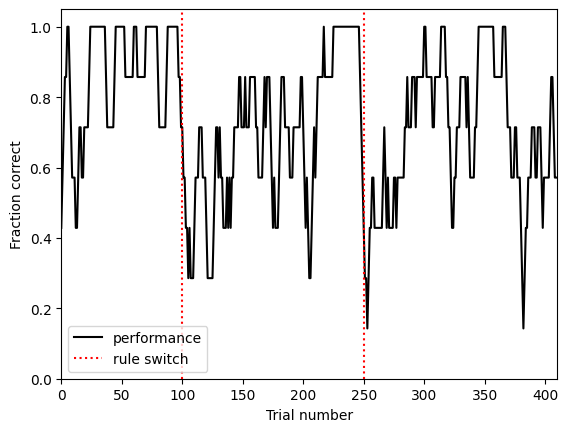

In [19]:
# get number of trials
nTrials = cueB.shape[0]

# compute moving average of correct for every 7 trials
corr_moving_avg = np.convolve(correctness, np.ones(7,)/7,mode='same')

# generate plot
plt.plot(np.arange(nTrials), corr_moving_avg,'k',label='performance')
plt.vlines(switches, ymin=0,ymax=1.05,colors='r', linestyles=':',label='rule switch')
plt.legend()
plt.xlim([0, nTrials])
plt.ylim([0, 1.05])
plt.xlabel('Trial number')
plt.ylabel('Fraction correct');

We can also extract the information about trial history RNN-derived strategy variables and make plots.

In [20]:
# extract stratey variables
association_mat = trial_df['association_mat'].values
rule_belief = trial_df['rule_belief'].values
signed_bias = trial_df['signed_bias'].values
rule_following = trial_df['rule_following'].values
bias_following = trial_df['bias_following'].values
prob_actual_cho = trial_df['prob_actual_cho'].values

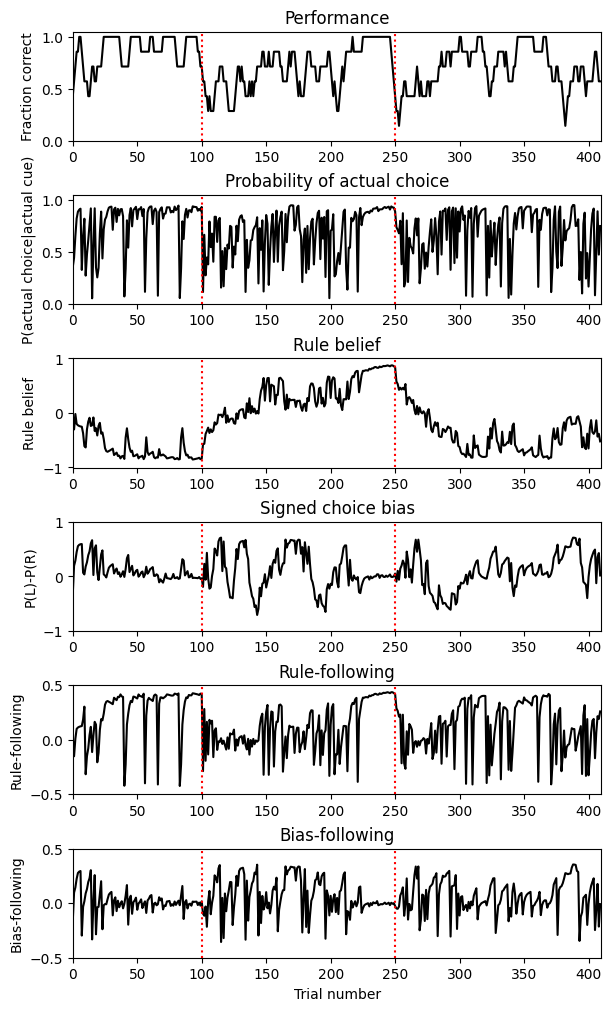

In [21]:
# make plots for strategy variables
fig, ax = plt.subplots(6,1,figsize=(6,10), constrained_layout=True)

ax[0].plot(np.arange(nTrials), corr_moving_avg, 'k')
ax[0].vlines(switches, ymin=0,ymax=1.05,colors='r', linestyles=':')
ax[0].set(xlim=[0, nTrials], ylim=[0, 1.05], ylabel='Fraction correct', title='Performance')

ax[1].plot(np.arange(nTrials), prob_actual_cho, 'k')
ax[1].vlines(switches, ymin=0,ymax=1.05,colors='r', linestyles=':')
ax[1].set(xlim=[0, nTrials], ylim=[0, 1.05], ylabel='P(actual choice|actual cue)', title='Probability of actual choice')

ax[2].plot(np.arange(nTrials), rule_belief, 'k')
ax[2].vlines(switches, ymin=-1,ymax=1,colors='r', linestyles=':')
ax[2].set(xlim=[0, nTrials], ylim=[-1,1], ylabel='Rule belief', title='Rule belief')

ax[3].plot(np.arange(nTrials), signed_bias, 'k')
ax[3].vlines(switches, ymin=-1,ymax=1,colors='r', linestyles=':')
ax[3].set(xlim=[0, nTrials], ylim=[-1,1], ylabel='P(L)-P(R)', title='Signed choice bias')

ax[4].plot(np.arange(nTrials), rule_following, 'k')
ax[4].vlines(switches, ymin=-0.5,ymax=0.5,colors='r', linestyles=':')
ax[4].set(xlim=[0, nTrials], ylim=[-0.5,0.5], ylabel='Rule-following', title='Rule-following')

ax[5].plot(np.arange(nTrials), bias_following, 'k')
ax[5].vlines(switches, ymin=-0.5,ymax=0.5,colors='r', linestyles=':')
ax[5].set(xlim=[0, nTrials], ylim=[-0.5,0.5], xlabel='Trial number', ylabel='Bias-following', title='Bias-following');


## Epochs

Epochs within the trials are labeled in the epoch table. One can find the `start_time`, `stop_time`, and associated `trial_id` of each epoch. There are 7 epoch types:

- **maze**: when the mouse was in the maze, equals to `maze_stem` + `maze_arm`
- **maze_stem**: when the mouse was in the maze stem
- **maze_arm**: when the mouse was in the maze arm
- **feedback_delay**: when the mouse was in the feedback delay period (lasted 1 second after it reached the end of the maze arm)
- **feedback**: when the mouse was in the feedback period with the visual feedback in correct trials (lasted 2 seconds after feedback delay)
- **iti**: when the mouse was in the intertrial interval (lasted 2 seconds for correct trials and 4 seconds for inccorect trials after feedback period)
- **feedback_and_iti**: when the mouse was not in the maze, equals to `feedback_delay + feedback period + iti`

**Note that although the epochs are annotated here, there are other ways to identify each epoch which would be aligned with the imaging frames (more useful for analyzing neural data). See following section "Easy way to extract epoch information" in the Behavior Processing Module.**

In [22]:
# convert epoch table into dataframe and examine it
epoch_df = nwb.epochs.to_dataframe()
epoch_df.head(14)

,start_time,stop_time,epoch_type,trial_id
id,,,,
0,30.14325,37.27825,maze,0
1,30.14325,35.61125,maze_stem,0
2,35.63400,37.27825,maze_arm,0
3,37.29775,38.28250,feedback_delay,0
4,38.30750,40.28075,feedback,0
5,40.56550,42.53775,iti,0
6,37.29775,42.53775,feedback_and_iti,0
7,42.57175,55.45550,maze,1
8,42.57175,53.10850,maze_stem,1


## Processing module 

There are two processing modules in the NWB file: `behavior` and `ophys`, the contain the processed behavior and calcium imaging data, respectively.


In [23]:
# view content of the porcessing modules
nwb.processing

{'behavior': behavior pynwb.base.ProcessingModule at 0x2172584521360
 Fields:
   data_interfaces: {
     frame_aligned_position <class 'pynwb.behavior.Position'>,
     frame_aligned_time_from_choice_point <class 'pynwb.base.TimeSeries'>,
     frame_aligned_trial_number <class 'pynwb.base.TimeSeries'>,
     frame_aligned_velocity <class 'pynwb.behavior.BehavioralTimeSeries'>,
     frame_to_verm_index_conversion <class 'pynwb.base.TimeSeries'>,
     plane_idx_for_imaging_frames <class 'pynwb.base.TimeSeries'>,
     velocity_RNN_prediction_for_choice_and_cue <class 'pynwb.behavior.BehavioralTimeSeries'>,
     verm_to_frame_index_conversion <class 'pynwb.base.TimeSeries'>
   }
   description: processed behavioral data,
 'ophys': ophys pynwb.base.ProcessingModule at 0x2172584522896
 Fields:
   data_interfaces: {
     ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
     deconvolved_activity_plane_0 <class 'pynwb.ophys.RoiResponseSeries'>,
     deconvolved_activity_plane_1 <class '

## Behavior processing module 

The behavior processing modules contains processed behavioral variables **aligned to the two-photon imaging frames** (sampled at 30 Hz), which is useful for analyzing neural data:

- **frame_aligned_position**: Position object that contains the SpatialSeries for forward and lateral position in the maze aligned to imaging frames
- **frame_aligned_velocity**: BehavioralTimeSeries object that contains the Timeseries for velocity of the spherical treadmill (pitch, roll, yaw) aligned to imaging frames. For roll velocity, positive is left 
- **velocity_RNN_prediction_for_choice_and_cue**: BehavioralTimeSeries object that contains the Timeseries for velocity RNN prediction for moment-by-moment choice and cue, in the order of 1. choice: decoded forward in time, aka dynamic choice, 2. choice: decoded reverse in time, 3. cue: decoded forward in time, aka cue-biased running, 4. cue: decoded reverse in time (see [Tseng et al. 2022](https://www.sciencedirect.com/science/article/pii/S0896627322004536?via%3Dihub) for modeling details and the interpretation of these results)
- **frame_aligned_trial_number**: Timeseries for trial number aligned to imaging frames
- **frame_aligned_time_from_choice_point**: Timeseries for time elapsed (sec) from choice point (the end of maze) aligned to imaging frames; negative: in maze, positive: during feedback and ITI
- **verm_to_frame_index_conversion**: Timeseries for correspoding imaging frame index for each Virmen frame (useful for pre-processing raw acqusition data only)
- **frame_to_verm_index_conversion**: Timeseries for correspoding verm frame index for each imaging frame (useful for pre-processing raw acqusition data only)

For multi-plane imaging session only:
- **plane_idx_for_imaging_frames**: Timeseries for plane index for each imaging frame



In [24]:
# view content of the behavior porcessing modules
nwb.processing['behavior']

behavior pynwb.base.ProcessingModule at 0x2172584521360
Fields:
  data_interfaces: {
    frame_aligned_position <class 'pynwb.behavior.Position'>,
    frame_aligned_time_from_choice_point <class 'pynwb.base.TimeSeries'>,
    frame_aligned_trial_number <class 'pynwb.base.TimeSeries'>,
    frame_aligned_velocity <class 'pynwb.behavior.BehavioralTimeSeries'>,
    frame_to_verm_index_conversion <class 'pynwb.base.TimeSeries'>,
    plane_idx_for_imaging_frames <class 'pynwb.base.TimeSeries'>,
    velocity_RNN_prediction_for_choice_and_cue <class 'pynwb.behavior.BehavioralTimeSeries'>,
    verm_to_frame_index_conversion <class 'pynwb.base.TimeSeries'>
  }
  description: processed behavioral data

Let's extract these variables:

In [25]:
# extract frame-aligned behavioral variables
imaging_frame_timestamps = nwb.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].timestamps[:]
frame_aligned_position = nwb.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].data[:]
frame_aligned_velocity = nwb.processing['behavior']['frame_aligned_velocity']['frame_aligned_pitch_roll_yaw_velocity'].data[:]
frame_aligned_trial_number = nwb.processing['behavior']['frame_aligned_trial_number'].data[:]
frame_aligned_time_from_choice_point = nwb.processing['behavior']['frame_aligned_time_from_choice_point'].data[:] 
plane_idx_for_imaging_frames = nwb.processing['behavior']['plane_idx_for_imaging_frames'].data[:]

imaging_frame_timestamps.shape, frame_aligned_position.shape, frame_aligned_velocity.shape, frame_aligned_trial_number.shape, frame_aligned_time_from_choice_point.shape

((162480,), (162480, 2), (162480, 3), (162480,), (162480,))

#### Positions and velocities
We can further separate forward and lateral positions from **frame_aligned_position**, and pitch, roll, yaw velocites from **frame_aligned_velocity**. Note that the forward and lateral positions are `nan` when the mice was in feedback period/ITI.

In [26]:
# get forward and lateral positions
posF = frame_aligned_position[:,0]
posL = frame_aligned_position[:,1]

# get pitch, roll and yaw velocities
pitch = frame_aligned_velocity[:,0]
roll = frame_aligned_velocity[:,1]
yaw = frame_aligned_velocity[:,2]

#### Valid trials

Note that `frame_aligned_trial_number` contains some `nan` becuase the imaging acquisition started earlier than the onset of the task. Also, sometimes the trial number in `frame_aligned_trial_number` is not continuous because the imaging acquisition was stopped briefly (for ~10 trials) in the middle of the task for adjustment of FOV shifts due to the brain motion.

One can find the "valid trials" in where corresponding imaging frames exist.

In [27]:
# identify valid trials (trials that have corresponding imaging frames)
validTrials = np.unique(frame_aligned_trial_number[~np.isnan(frame_aligned_trial_number)]).astype(int)
nValidTrials = validTrials.shape[0]

nValidTrials, nTrials

(410, 410)

#### Velocity RNN-derived variables (dynamic choice and cue-biased running)

The velocity RNN-decoded choice and cues (including dynamic choice and cue-biased running) were modeled at 6 Hz instead of 30 Hz, i.e. they were aligned to the 3rd plane of the 5 planes for multi-plane imaging sessions (or equivalently, the 3rd, 8rd, 13th, ...etc. planes for single plane imaging sessinon). These variables also contain `nan` in trials where imaging data for the whole trials were not available (due to interruption of acquisition). 

In [28]:
# extract velocity RNN-derived variables and timestamps
RNNpred_timestamps = nwb.processing['behavior']['velocity_RNN_prediction_for_choice_and_cue']['velocity_RNN_prediction_for_choice_and_cue'].timestamps[:]
velocity_RNN_prediction = nwb.processing['behavior']['velocity_RNN_prediction_for_choice_and_cue']['velocity_RNN_prediction_for_choice_and_cue'].data[:]
dynamic_choice = velocity_RNN_prediction[:,0] # dynamic choice is the choice predicted forward in time 
cue_bias_running = velocity_RNN_prediction[:,2] # cue-biased running is the cue predicted forward in time 

RNNpred_timestamps.shape, dynamic_choice.shape, cue_bias_running.shape

((32496,), (32496,), (32496,))

#### Visualization

Let's create some visualization for the behavioral data. Let's first examine the raw timeseries.

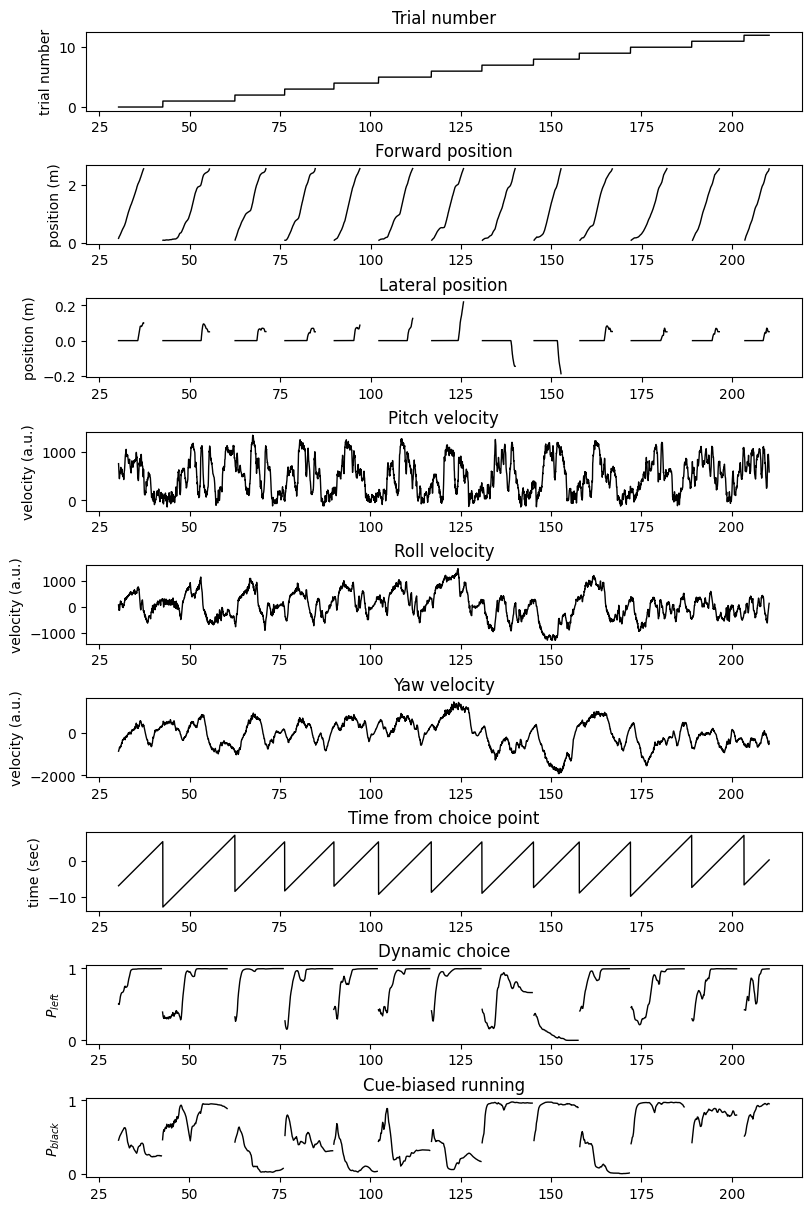

In [29]:
t_start = 600
t_end = 6000
f, ax = plt.subplots(9 , 1, figsize=(8, 12), constrained_layout=True)

ax[0].plot(imaging_frame_timestamps[t_start:t_end],frame_aligned_trial_number[t_start:t_end],'k',lw=1)
ax[0].set(ylabel = 'trial number', title='Trial number')

ax[1].plot(imaging_frame_timestamps[t_start:t_end],posF[t_start:t_end],'k',lw=1)
ax[1].set(ylabel = 'position (m)', title='Forward position')

ax[2].plot(imaging_frame_timestamps[t_start:t_end],posL[t_start:t_end],'k',lw=1)
ax[2].set(ylabel = 'position (m)', title='Lateral position')

ax[3].plot(imaging_frame_timestamps[t_start:t_end],pitch[t_start:t_end],'k',lw=1)
ax[3].set(ylabel = 'velocity (a.u.)', title='Pitch velocity')

ax[4].plot(imaging_frame_timestamps[t_start:t_end],roll[t_start:t_end],'k',lw=1)
ax[4].set(ylabel = 'velocity (a.u.)', title='Roll velocity')

ax[5].plot(imaging_frame_timestamps[t_start:t_end],yaw[t_start:t_end],'k',lw=1)
ax[5].set(ylabel = 'velocity (a.u.)', title='Yaw velocity')

ax[6].plot(imaging_frame_timestamps[t_start:t_end],frame_aligned_time_from_choice_point[t_start:t_end],'k',lw=1)
ax[6].set(ylabel = 'time (sec)', title='Time from choice point')

# velocity RNN-derived variables are sampled at 6 Hz instead of 30 Hz
ax[7].plot(RNNpred_timestamps[t_start//5:t_end//5],dynamic_choice[t_start//5:t_end//5],'k',lw=1)
ax[7].set(ylabel = '$P_{left}$', title='Dynamic choice')

ax[8].plot(RNNpred_timestamps[t_start//5:t_end//5],cue_bias_running[t_start//5:t_end//5],'k',lw=1)
ax[8].set(ylabel = '$P_{black}$', title='Cue-biased running');

#### Trial-type averaged plots
To make trial-type average plots of these behavioral variables, we can first extract some useful task variables from `lab_meta_data`. The length of maze configuration is multiplied by 0.01 (the value of **meter_per_virmen_unit**) to convert from Virmen unit to meter (to be consistent with the measured position).

In [30]:
## extract important task parameters from lab meta data
# maze configuration
meter_per_virmen_unit = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__meter_per_virmen_unit # 1 Virmen unit in the maze ~= 0.01 m
stem_length = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__maze_stem_length*meter_per_virmen_unit
arm_length = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__maze_arm_length*meter_per_virmen_unit

# the length of the cue delay before the maze arms (sueful if you're analyzing visual response to the cue)
cue_delay_length = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__cue_delay_length*meter_per_virmen_unit

# the length of the feedback delay in seconds
feedback_delay = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__feedback_delay_sec

# the length of the reward delay in seconds (equals length of the feedback delay + feedback period)
reward_delay = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__reward_delay_sec

# the lenght of ITI for correct and incorrect trials
iti_correct = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__iti_correct_sec
iti_incorrect = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__iti_incorrect_sec

Next we created position (in the maze) and temporally-binned (in feedback/ITI) velocity, such as roll velocity, for every valid trial.

In [31]:
# define utility function for position and temporal binning (of single trials)
def pos_tm_binning(X, posF, time_from_cho, pos_centers, pos_half_width, tm_centers, tm_half_width):
    '''
    Bin input X by positions and time

    Input parameters::
    X: variable for binning, ndarray
    posF: position for each point in X, ndarray of shape (X.shape[0],)
    time_from_cho: time from choice point for each point in X, ndarray of shape (X.shape[0],)
    pos_centers: center locations for position bins, ndarray
    pos_half_width: half width of position center, float
    tm_centers: center locations for time bins, ndarray
    tm_half_width: half width of time bins, float

    Returns:
    X_pos: position-binned X, ndarray of shape (n_pos_bins, X.shape[1])
    X_tm: time-binned X, ndarray of shape (n_tm_bins, X.shape[1])
    '''
    # Sanity check and prelocate
    if X.ndim == 1:
        X = X.reshape(-1,1)
    X_pos = np.full((pos_centers.shape[0],X.shape[1]),np.NaN)
    X_tm = np.full((tm_centers.shape[0],X.shape[1]),np.NaN)
    
    # Calcuate position-binned X
    for pos_ind, pos_cent in enumerate(pos_centers):
        these_frames = np.logical_and(posF > (pos_cent - pos_half_width), posF < (pos_cent + pos_half_width))
        X_pos[pos_ind,:] = np.mean(X[these_frames,:], axis = 0)

    # Calcuate time-binned X  
    for tm_ind, tm_cent in enumerate(tm_centers):
        these_frames = np.logical_and(time_from_cho > (tm_cent - tm_half_width), time_from_cho < (tm_cent + tm_half_width))
        X_tm[tm_ind,:] = np.mean(X[these_frames,:], axis = 0)

    return X_pos, X_tm

In [32]:
## perform spatial and temporal binning for roll velocity for all valid trials
# select roll velocity
this_vel = roll.copy()

# set up position bins
pos_half_width = 0.1
maze_length = (stem_length + arm_length)
pos_bins = np.arange(0.1, maze_length + 0.05, pos_half_width)

# set up time bins
tm_half_width = 1/3
feedback_iti_corr_length = reward_delay + iti_correct
tm_bins = np.arange(0, feedback_iti_corr_length + 0.1, tm_half_width)

# prelocate
vel_pos = np.full((nValidTrials, pos_bins.shape[0]), np.NaN)
vel_tm = np.full((nValidTrials, tm_bins.shape[0]), np.NaN)
                             
# loop over trials for binning
for i_trial, this_trial in enumerate(validTrials):
    these_frames = frame_aligned_trial_number==this_trial
    this_pos, this_tm = pos_tm_binning(this_vel[these_frames], posF[these_frames], frame_aligned_time_from_choice_point[these_frames], 
                                       pos_bins, pos_half_width, tm_bins, tm_half_width)
    vel_pos[i_trial,:] = this_pos.flatten()
    vel_tm[i_trial,:] = this_tm.flatten()
    

# find cue and choice for valid trials
cue_valid = cueB[validTrials]
cho_valid = choL[validTrials]
trial_type = 2*cue_valid + cho_valid
trial_type_name = ['white-right','white-left','black-right', 'black-left']
trial_type_color = ['pink','cyan','r','b']

Then we can generate plots for average roll velocity for each of the four trial types: white-right, white-left, black-right, and black-left.

C:\Users\Shih-Yi\Anaconda3\envs\dandi_new\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


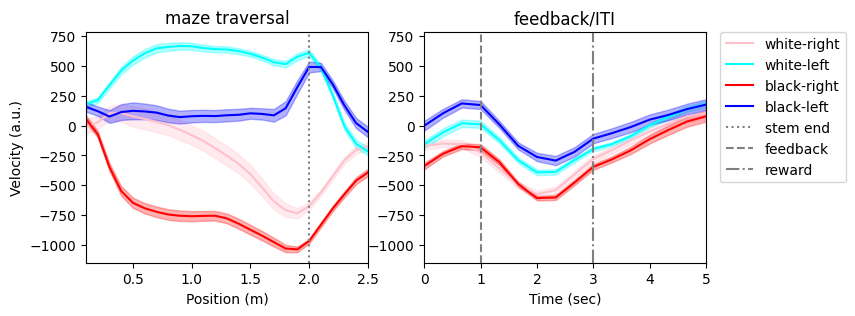

In [33]:
# plot average roll velocity (mean+-SEM)
fig, ax = plt.subplots(1,2,figsize=(8,3))
for i_type in range(4):
    this_mean_pos = np.nanmean(vel_pos[trial_type==i_type,:], axis=0)
    this_sem_pos = np.nanstd(vel_pos[trial_type==i_type,:],axis=0)/np.sqrt(np.sum(trial_type==i_type))
    ax[0].plot(pos_bins, this_mean_pos, color=trial_type_color[i_type])
    ax[0].fill_between(pos_bins, this_mean_pos-this_sem_pos, this_mean_pos+this_sem_pos, color=trial_type_color[i_type],alpha=0.3)       

    this_mean_tm = vel_tm[trial_type==i_type,:].mean(axis=0)
    this_sem_tm = vel_tm[trial_type==i_type,:].std(axis=0)/np.sqrt(np.sum(trial_type==i_type))
    ax[1].plot(tm_bins, this_mean_tm, color=trial_type_color[i_type],label=trial_type_name[i_type])
    ax[1].fill_between(tm_bins, this_mean_tm-this_sem_tm, this_mean_tm+this_sem_tm, color=trial_type_color[i_type],alpha=0.3)

y1_min, y1_max = ax[0].get_ylim()
y2_min, y2_max = ax[1].get_ylim()
ax[0].vlines(stem_length, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(np.nan, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(feedback_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='--', label = 'feedback')  
ax[1].vlines(reward_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='-.', label = 'reward') 
ax[0].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0.1,2.5], xlabel='Position (m)', ylabel='Velocity (a.u.)',title='maze traversal')
ax[1].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0,5], xlabel='Time (sec)',title='feedback/ITI')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


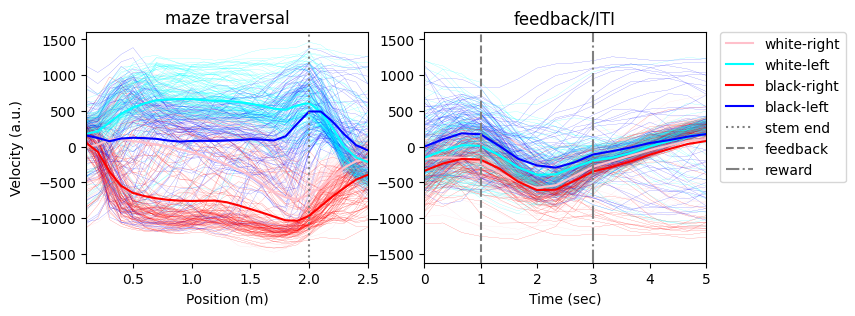

In [34]:
# plot average roll velocity with single trial traces
fig, ax = plt.subplots(1,2,figsize=(8,3))
for i_trial in range(nValidTrials):
    ax[0].plot(pos_bins, vel_pos[i_trial,:], color=trial_type_color[trial_type[i_trial]],lw=0.1)
    ax[1].plot(tm_bins, vel_tm[i_trial,:], color=trial_type_color[trial_type[i_trial]],lw=0.1)
    
for i_type in range(4):
    this_mean_pos = np.nanmean(vel_pos[trial_type==i_type,:], axis=0)
    ax[0].plot(pos_bins, this_mean_pos, color=trial_type_color[i_type])    
    this_mean_tm = vel_tm[trial_type==i_type,:].mean(axis=0)
    ax[1].plot(tm_bins, this_mean_tm, color=trial_type_color[i_type],label=trial_type_name[i_type])

y1_min, y1_max = ax[0].get_ylim()
y2_min, y2_max = ax[1].get_ylim()
ax[0].vlines(stem_length, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(np.nan, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(feedback_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='--', label = 'feedback')  
ax[1].vlines(reward_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='-.', label = 'reward') 
ax[0].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0.1,2.5], xlabel='Position (m)', ylabel='Velocity (a.u.)',title='maze traversal')
ax[1].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0,5], xlabel='Time (sec)',title='feedback/ITI')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Easy way to extract epoch information

As we see a little bit in the binning function, using these frame aligned behavioral variables, we can find the imaging frames correponding to each epoch easily:

In [35]:
# find corresponding imaging frames for different epochs
maze_stem_frames = np.logical_and(posF >= 0, posF < stem_length)
maze_arm_frames = np.logical_and(posF >= stem_length, posF <= maze_length)
maze_frames = np.logical_and(posF >= 0, posF <= maze_length)
feedback_delay_frames = np.logical_and(frame_aligned_time_from_choice_point >= 0, frame_aligned_time_from_choice_point < feedback_delay)
feedback_frames = np.logical_and(frame_aligned_time_from_choice_point >= feedback_delay, frame_aligned_time_from_choice_point < reward_delay)
iti_frames = frame_aligned_time_from_choice_point >= reward_delay

We can also restrict on a particular trial:

In [36]:
# find corresponding imaging frames for maze stem during trial 0 
this_trial = 0
this_trial_maze_stem_frames = np.logical_and(maze_stem_frames, frame_aligned_trial_number==this_trial)

## Ophys processing module (for calcium imaging neural data)

The `ophys` processing module contains data for two-photon calcium imaging, including ImageSegmentation (with neuron information in each imaging planes), deconvolved activity, dF/F, static GCaMPand retrograde images for each imaging planes, and the vessel pattern image of this FOV taken at the top of the brain.

In [37]:
# view content of ophys processing module 
nwb.processing['ophys']

ophys pynwb.base.ProcessingModule at 0x2172584522896
Fields:
  data_interfaces: {
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    deconvolved_activity_plane_0 <class 'pynwb.ophys.RoiResponseSeries'>,
    deconvolved_activity_plane_1 <class 'pynwb.ophys.RoiResponseSeries'>,
    deconvolved_activity_plane_2 <class 'pynwb.ophys.RoiResponseSeries'>,
    deconvolved_activity_plane_3 <class 'pynwb.ophys.RoiResponseSeries'>,
    df_over_f_plane_0 <class 'pynwb.ophys.DfOverF'>,
    df_over_f_plane_1 <class 'pynwb.ophys.DfOverF'>,
    df_over_f_plane_2 <class 'pynwb.ophys.DfOverF'>,
    df_over_f_plane_3 <class 'pynwb.ophys.DfOverF'>,
    static_GCaMP_and_retrograde_label_image_plane_0 <class 'pynwb.base.Images'>,
    static_GCaMP_and_retrograde_label_image_plane_1 <class 'pynwb.base.Images'>,
    static_GCaMP_and_retrograde_label_image_plane_2 <class 'pynwb.base.Images'>,
    static_GCaMP_and_retrograde_label_image_plane_3 <class 'pynwb.base.Images'>,
    vessel_img <class '

### Neuron information
The `ImageSegmentation` contains `PlaneSegmentation` objects for each imaging plane (4 planes for multi-plane imaging sessions and 1 plane for single plane imaging session). Within each `PlaneSegmentation`, one can find information about each neuron recorded from this plane:
- **ml**: the coordinate along medial-lateral axis in minimeters after registration into Allen Institute's Mouse Common Coordinate Framework (CCF)
- **ap**: the coordinate along anterior-posterior axis in minimeters in CCF
- **depth**: the depth underneath the pia in minimeters 
- **area**: one of the 6 discrete cortical areas that this neuron resided in
- **mTagBFP2**: whether this neuron was labeled with mTagBFP2 (see the AAVretro injection site to know which area this neuron projected to)
- **mScarlet**: whether this neuron was labeled with mScarlet
- **pixel_mask**: the pixel mask (spatial footprint) of this neuron, in the format of [x, y, pixel intesnity] in the raw images (512 x 512)


In [38]:
# view content of ImageSegmentation
nwb.processing['ophys']['ImageSegmentation']

ImageSegmentation pynwb.ophys.ImageSegmentation at 0x2172603151632
Fields:
  plane_segmentations: {
    PlaneSegmentation_0 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation_1 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation_2 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation_3 <class 'pynwb.ophys.PlaneSegmentation'>
  }

In [39]:
# convert the first PlaneSegmentation into dataframe and examine the information
planeSeg_0_df = nwb.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()
planeSeg_0_df.head(20)

,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-1.83153,-1.67308,0.115,A,True,False,"[[483, 258, 91007.11], [482, 259, 157956.42], ..."
1,-1.81635,-1.72861,0.115,A,False,True,"[[475, 217, 11779.721], [476, 217, 21893.092],..."
2,-1.40609,-1.43519,0.115,A,False,False,"[[178, 405, 32037.309], [179, 405, 28367.28], ..."
3,-1.35358,-1.47856,0.115,A,True,False,"[[146, 371, 16934.56], [147, 371, 34940.188], ..."
4,-1.33481,-1.46609,0.115,A,False,False,"[[136, 379, 49693.73], [134, 380, 106279.6], [..."
5,-1.39399,-1.43513,0.115,A,False,False,"[[171, 407, 129510.016], [172, 407, 175824.52]..."
6,-1.80346,-1.75859,0.115,A,False,False,"[[470, 192, 61868.5], [471, 192, 107326.45], [..."
7,-1.42985,-1.66434,0.115,A,False,False,"[[210, 238, 121663.39], [211, 238, 87916.88], ..."
8,-1.48183,-1.45869,0.115,A,False,False,"[[232, 395, 18493.646], [233, 395, 28247.006],..."


In [40]:
# extract information for these neurons in plane 0
ml_0 = planeSeg_0_df['ml'].values
ap_0 = planeSeg_0_df['ap'].values
depth_0 = planeSeg_0_df['depth'].values
area_0 = planeSeg_0_df['area'].values
mTagBFP2_0 = planeSeg_0_df['mTagBFP2'].values
mScarlet_0 = planeSeg_0_df['mScarlet'].values

# compute number of neurons in this plane
n_neurons_0 = ml_0.shape[0]

#### Visualize pixel masks for neurons
We can visualize the pixel masks for all neurons in this imaging plane:

In [41]:
# overlay pixel masks for all sources in plane 0
source_img = np.zeros((512,512)) # the imaging FOV was 512 x 512

for i_neuron in range(n_neurons_0):
    n_pixels = planeSeg_0_df['pixel_mask'][i_neuron].shape[0]
    for i_pixel in range(n_pixels):
        x, y, w = planeSeg_0_df['pixel_mask'][i_neuron][i_pixel]
        source_img[x,y] += w

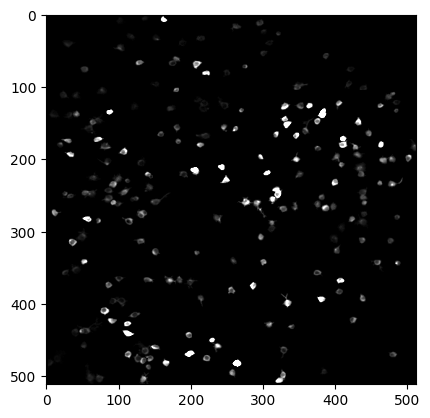

In [42]:
# display the overlay image
plt.imshow(source_img, vmax = np.percentile(source_img[:],99.5) ,cmap='gray');

### Neural activity

For each `PlaneSegmentation`, there is a corresponding **deconvolved_activity** and a **df_over_f** object that have the `RoiResponseSeries` for the deconvolved activity and dF/F timeseries for all neurons in that imaging plane. They share the same timestamps. 

In [43]:
# view deconvolved_activity and df_over_f RoiResponseSeries for the first imaging plane
nwb.processing['ophys']['deconvolved_activity_plane_0'], nwb.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0']

(deconvolved_activity_plane_0 pynwb.ophys.RoiResponseSeries at 0x2172603140112
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (32496, 224), type "<f8">
   description: Deconvolved activity for ROIs in PlaneSegmentation_0
   interval: 1
   offset: 0.0
   resolution: -1.0
   rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
   timestamp_link: (
     dF_over_F_plane_0 <class 'pynwb.ophys.RoiResponseSeries'>
   )
   timestamps: <HDF5 dataset "timestamps": shape (32496,), type "<f8">
   timestamps_unit: seconds
   unit: A.U.,
 dF_over_F_plane_0 pynwb.ophys.RoiResponseSeries at 0x2172603493712
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (32496, 224), type "<f8">
   description: dF/F for ROIs in PlaneSegmentation_0
   interval: 1
   offset: 0.0
   resolution: -1.0
   rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
   timestamps: deconvolved_activity_plane_0 pynwb.ophys.RoiResponseSeries 

In [44]:
# extract data from deconvolved_activity_plane_0 and 
imaging_timestamps_0 = nwb.processing['ophys']['deconvolved_activity_plane_0'].timestamps
deconv_0 = nwb.processing['ophys']['deconvolved_activity_plane_0'].data[:]
df_0 = nwb.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0'].data[:]

imaging_timestamps_0.shape, deconv_0.shape, df_0.shape, n_neurons_0

((32496,), (32496, 224), (32496, 224), 224)

#### Visualization  of neural activity

First we can examine the timeseries of the deconvloved activity of some neurons.

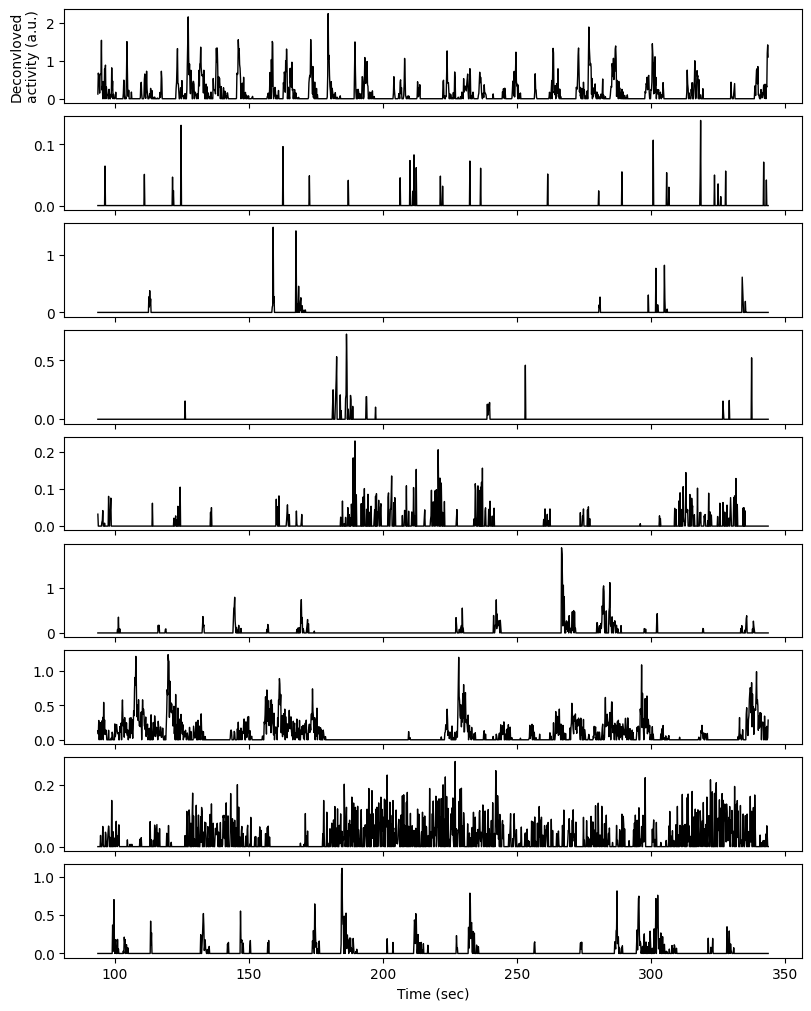

In [45]:
# plot deconvloved activity for the first 9 neurons
t_start = 500
t_end = 2000
f, ax = plt.subplots(9 , 1, figsize=(8, 10), constrained_layout=True)

for i_neuron in range(9):
    ax[i_neuron].plot(imaging_timestamps_0[t_start:t_end],deconv_0[t_start:t_end,i_neuron],'k',lw=1)
    if i_neuron == 8:
        ax[i_neuron].set(xlabel='Time (sec)')
    else:
        ax[i_neuron].set(xticklabels=[])
    if i_neuron == 0:
        ax[i_neuron].set(ylabel=f'Deconvloved\nactivity (a.u.)')


#### Alignment of behavioral timeseries and individual imaging plane (for multi-plane imaging sessions)
For multi-plane imaging sessions, there are 5 planes per "volume" (4 imaging planes + 1 flyback frame), so the sampling rate for each plane is 30/5 = 6 Hz. To find the corresponding behavioral timeseries aligned to the imaging frames of each imaging plane, one can use (1) the `plane_idx_for_imaging_frames` or (2) regular spacing for indexing those behavioral timeseries. In this way, you can avoid complicated alignment through the timestamps stored in those objects, although the information is present.

In [46]:
# use plane_idx_for_imaging_frames to identify behavioral variables corresponding to this imaging plane
nPlane = 0
frame_idx_0 = plane_idx_for_imaging_frames == nPlane
trial_number_0 = frame_aligned_trial_number[frame_idx_0]
posF_0 = posF[frame_idx_0]
time_from_choice_point_0 = frame_aligned_time_from_choice_point[frame_idx_0]

In [47]:
# alternatively, use regular spacing for every 5 planes
trial_number_0 = frame_aligned_trial_number[nPlane::5]
posF_0 = posF[nPlane::5]
time_from_choice_point_0 = frame_aligned_time_from_choice_point[nPlane::5]

#### Trial-type averaged activity plots
Now we can bin the activity of the neurons into spatial (in the maze) and temporal (during feedback/ITI) bins for every trial.

In [48]:
# position and temporal binning for deconvolved activity
activity_pos = np.full((nValidTrials, pos_bins.shape[0], n_neurons_0), np.NaN)
activity_tm = np.full((nValidTrials, tm_bins.shape[0], n_neurons_0), np.NaN)
                             
for i_neuron in range(n_neurons_0):
    for i_trial, this_trial in enumerate(validTrials):
        these_frames = trial_number_0==this_trial
        this_pos, this_tm = pos_tm_binning(deconv_0[these_frames,i_neuron], posF_0[these_frames], time_from_choice_point_0[these_frames], 
                                           pos_bins, pos_half_width, tm_bins, tm_half_width)
        activity_pos[i_trial,:,i_neuron] = this_pos.flatten()
        activity_tm[i_trial,:,i_neuron] = this_tm.flatten()

Make trial-type average deconvolved activity for selected neuron.

C:\Users\Shih-Yi\Anaconda3\envs\dandi_new\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


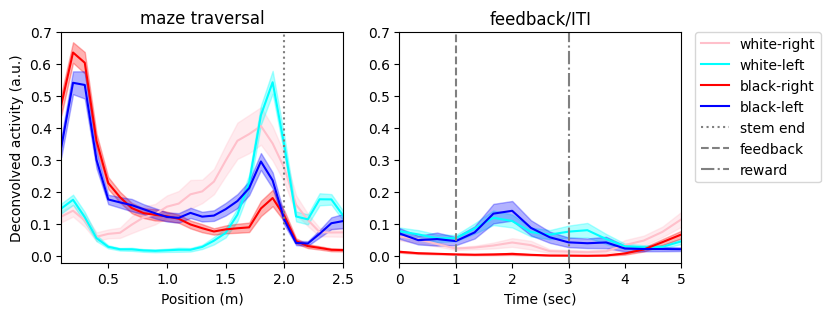

In [49]:
selected_neuron = 0

# plot trial-type average deconvolved activity for selected neuron (mean+-SEM)
fig, ax = plt.subplots(1,2,figsize=(8,3))
for i_type in range(4):
    this_mean_pos = np.nanmean(activity_pos[trial_type==i_type,:,selected_neuron], axis=0)
    this_sem_pos = np.nanstd(activity_pos[trial_type==i_type,:,selected_neuron],axis=0)/np.sqrt(np.sum(trial_type==i_type))
    ax[0].plot(pos_bins, this_mean_pos, color=trial_type_color[i_type])
    ax[0].fill_between(pos_bins, this_mean_pos-this_sem_pos, this_mean_pos+this_sem_pos, color=trial_type_color[i_type],alpha=0.3)       

    this_mean_tm = activity_tm[trial_type==i_type,:,selected_neuron].mean(axis=0)
    this_sem_tm = activity_tm[trial_type==i_type,:,selected_neuron].std(axis=0)/np.sqrt(np.sum(trial_type==i_type))
    ax[1].plot(tm_bins, this_mean_tm, color=trial_type_color[i_type],label=trial_type_name[i_type])
    ax[1].fill_between(tm_bins, this_mean_tm-this_sem_tm, this_mean_tm+this_sem_tm, color=trial_type_color[i_type],alpha=0.3)

y1_min, y1_max = ax[0].get_ylim()
y2_min, y2_max = ax[1].get_ylim()
ax[0].vlines(stem_length, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(np.nan, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls=':', label = 'stem end') 
ax[1].vlines(feedback_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='--', label = 'feedback')  
ax[1].vlines(reward_delay, np.min((y1_min,y2_min)), np.max((y1_max,y2_max)), color='gray', ls='-.', label = 'reward') 
ax[0].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0.1,2.5], xlabel='Position (m)', ylabel='Deconvolved activity (a.u.)',title='maze traversal')
ax[1].set(ylim=[np.min((y1_min,y2_min)), np.max((y1_max,y2_max))], xlim=[0,5], xlabel='Time (sec)',title='feedback/ITI')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


### Static images

In the ophys processing module, you can also find `static_GCaMP_and_retrograde_label_image` for each imaging plane and `vessel_img` as the vessel pattern at brain surface for this FOV.


In [50]:
# view content of the static images for plane 0
nwb.processing['ophys']['static_GCaMP_and_retrograde_label_image_plane_0']

static_GCaMP_and_retrograde_label_image_plane_0 pynwb.base.Images at 0x2172603255184
Fields:
  description: static unmixed images for GCaMP and retrograde labels of the FOV
  images: {
    GCaMP_800nm <class 'pynwb.image.GrayscaleImage'>,
    GCaMP_850nm <class 'pynwb.image.GrayscaleImage'>,
    mScarlet_800nm <class 'pynwb.image.GrayscaleImage'>,
    mTagBFP2_850nm <class 'pynwb.image.GrayscaleImage'>
  }

In [51]:
# extract static images for this imaging plane
# (GCaMP image acquired at 850 nm shows the anatomical image)
GCaMP_img = nwb.processing['ophys']['static_GCaMP_and_retrograde_label_image_plane_0']['GCaMP_850nm'].data[:]
mScarlet_img = nwb.processing['ophys']['static_GCaMP_and_retrograde_label_image_plane_0']['mScarlet_800nm'].data[:]
mTagBFP2_img = nwb.processing['ophys']['static_GCaMP_and_retrograde_label_image_plane_0']['mTagBFP2_850nm'].data[:]
vessel_img = nwb.processing['ophys']['vessel_img']['vessel_img'].data[:]

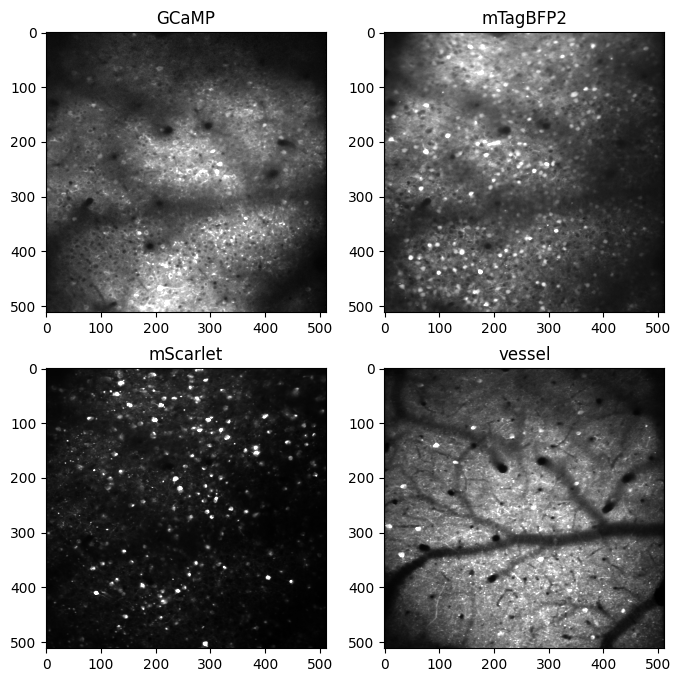

In [52]:
# visualize
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(GCaMP_img, vmax = np.percentile(GCaMP_img[:], 99.5), cmap='gray')
ax[0,0].set(title = 'GCaMP')
ax[0,1].imshow(mTagBFP2_img, vmax = np.percentile(mTagBFP2_img[:], 99.5), cmap='gray')
ax[0,1].set(title = 'mTagBFP2')
ax[1,0].imshow(mScarlet_img, vmax = np.percentile(mScarlet_img[:], 99.5), cmap='gray')
ax[1,0].set(title = 'mScarlet')
ax[1,1].imshow(vessel_img, vmax = np.percentile(vessel_img[:], 99.5), cmap='gray')
ax[1,1].set(title = 'vessel');

### Other information related to imaging and registration

#### Device and Imaging planes
The information about the devices and imaging_planes can be found in the NWB file too:

In [53]:
nwb.devices

{'two_photon_microscope': two_photon_microscope pynwb.device.Device at 0x2171778041232
 Fields:
   description: Two-photon microscope
   manufacturer: Harvey Lab custom-bulit two-photon microscope (Odin)}

In [54]:
nwb.imaging_planes

{'ImagingPlane_GCaMP6s_920nm': ImagingPlane_GCaMP6s_920nm pynwb.ophys.ImagingPlane at 0x2172584524752
 Fields:
   conversion: 1.0
   description: volume calcium imaging in visA layer 2/3
   device: two_photon_microscope pynwb.device.Device at 0x2171778041232
 Fields:
   description: Two-photon microscope
   manufacturer: Harvey Lab custom-bulit two-photon microscope (Odin)
 
   excitation_lambda: 920.0
   imaging_rate: 30.0
   indicator: GCaMP6s
   location: visA
   optical_channel: (
     OpticalChannel_GCaMP <class 'pynwb.ophys.OpticalChannel'>
   )
   reference_frame: [p->a, l->m, depth from pia] in minimeters from bregma in Allen Institute Mouse Common Coordinate Framework (CCF); i.e. directionality of the imaging FOV: x-axis: posterior to anterior; y-axis: laterl (left) to medial (right); however, the FOV axes does not run parallelly to the CCF coordinate system. The following transformation matrix can be applied to a column vector of pixel coordiate ([x,y,1].T) to [ml, ap, _] in 

The GCaMP imaging (functional) was acquired with 920 nm excitation wavelength, as well as at 850 nm for structural images. The mTagBFP2 images were captured at 850 nm, and the mScarlet images were captured at 800 nm.

#### More in session-specific lab meta data

You can also find other information related to imaging and registration in the session-specific `lab_meta_data` under **Imaging** and **Registration**, such as center location and area for the FOV, and transformation matrix that converts pixel coordinate of the FOV into Allen CCF coordinate. 

In [55]:
nwb.lab_meta_data['harvey_lab_swac_metadata_session']

harvey_lab_swac_metadata_session abc.LabMetaDataSession at 0x2172585341968
Fields:
  AAVretroInjSite__mScarlet: OFC
  AAVretroInjSite__mTagBFP2: posterior_ACC_M2
  Imaging__cortical_layer: 2/3
  Imaging__imaging_type: multi-plane
  Imaging__num_of_frame_per_volume: 5
  Imaging__num_of_imaging_plane: 4
  Registration__fov_center_ap_ccf_mm: -1.65221
  Registration__fov_center_area: visA
  Registration__fov_center_ml_ccf_mm: -1.49755
  Registration__fov_depth_mm: 0.115
  Registration__fov_plane_step_size_mm: 0.025
  Registration__fov_to_ccf_transformation_matrix: [[-1.28091964e-04 -1.46927372e-03 -1.08862203e+00]
 [ 1.33139914e-03 -1.40467401e-04 -1.95708382e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
  TaskParam__choice_bias_penalty: 0.0
  TaskParam__cue_delay_length: 10.0
  TaskParam__feedback_delay_sec: 1.0
  TaskParam__frac_non_visually_guided_trials: 0.8
  TaskParam__initial_rule: B
  TaskParam__iti_correct_sec: 2.0
  TaskParam__iti_incorrect_sec: 4.0
  TaskParam__max_po

For example, we can extract information about this FOV after registration to Allen CCF.

In [56]:
# Cortical location where this FOV was centered on
fov_center_area = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_center_area

# ML coordinate in Allen CCF for the center location of this FOV
fov_center_ml_ccf_mm = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_center_ml_ccf_mm

# AP coordinate in Allen CCF for the center location of this FOV
fov_center_ap_ccf_mm = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_center_ap_ccf_mm

# Depth from pia of the top plane
fov_depth_mm = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_depth_mm

# Step size between each imaging plane
fov_plane_step_size_mm = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_plane_step_size_mm

The **fov_to_ccf_transformation_matrix** converts pixel coordinate in this FOV to Allen CCF.

In [57]:
# extract the transformation matrix
fov_to_ccf_transformation_matrix = nwb.lab_meta_data['harvey_lab_swac_metadata_session'].Registration__fov_to_ccf_transformation_matrix

For example, we can convert the center location of the FOV (512 x 512 pixels) to coordinate in CCF:

In [58]:
# specify center location in pixel coordinate (always put "1" in the third dimension)
center_coordinate_pixel = np.array([256,256,1]).T

# apply transformation function
center_coordinate_ccf = np.matmul(fov_to_ccf_transformation_matrix,center_coordinate_pixel)

# compare the results (the first two elements)
center_coordinate_ccf[:2], fov_center_ml_ccf_mm, fov_center_ap_ccf_mm

(array([-1.49754765, -1.65220529]), -1.49755, -1.65221)

# Section B: Read NWB file for widefield retinotopy and 2P window overview

In this section, we desribe how to read and extract information from the other type of NWB file. In the folder for every mouse, you can find a file named *sub-#_ses-Mouse-#-widefield-retinotopy-and-window-vessel_ophys.nwb*. This it the file for widefield retinotopy and two-photon overview vessel/AAVretro labeling images of each mouse. These mouse-level data was used for registration of the whole cranial window as well as the FOVs for individual behavior+imaging sessions into the Allen Institute Mouse Common Coordinate Framework (CCF).

For example, let's download the file for mouse #9.

`dandi download https://api.dandiarchive.org/api/assets/cd183c6f-be6e-4773-9320-23a4baed37e6/download/`

In [59]:
# specify the file path in your local file system (PLEASE CHANGE THIS!)
retinoFilepath = 'Z:\\HarveyLab\\Tier1\\Shih_Yi\\dandiset\\000579\\sub-9\\sub-9_ses-Mouse-9-widefield-retinotopy-and-window-vessel_ophys.nwb'

In [60]:
# load the file and display the content
io = NWBHDF5IO(retinoFilepath, 'r')
nwb_retino = io.read()
nwb_retino

root pynwb.file.NWBFile at 0x2172722166544
Fields:
  devices: {
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  experiment_description: Widefield retinotopy and 2p window vessel and retrograde label overview
  experimenter: ['Tseng, Shih-Yi']
  file_create_date: [datetime.datetime(2023, 7, 21, 10, 37, 48, 271115, tzinfo=tzoffset(None, -14400))]
  identifier: Mouse_9_widefield_retinotopy_and_window_vessel
  imaging_planes: {
    ImagingPlane_mScarlet_800nm <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlane_mTagBFP2_850nm <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Harvard Medical School
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Harvey Lab
  lab_meta_data: {
    harvey_lab_swac_metadata_mouse <class 'abc.LabMetaDataMouse'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>,
    retinotopy <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['doi:10.1016/j.neuron.2022.05.012']
  session_descr

The `subject`, `surgery` and `virus` notes are identical to those in the single behavior+imaging session NWB file for this mouse.

In [61]:
nwb_retino.subject

subject pynwb.file.Subject at 0x2172802214800
Fields:
  age__reference: birth
  date_of_birth: 2017-03-01 00:00:00-05:00
  description: Mouse 9 Askin, date of arrival 2017-04-26 (~8 weeks old; date of birth is approximated), training started on 2017-06-01
  genotype: wildtype
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: 9

In [62]:
nwb_retino.surgery

'cranial window creation date:2017-05-25, 3.5 mm diameter, left posterior cortex; AAVretro injection date:2017-05-25; GCaMP6s injection date:2017-07-26; performed by Shih-Yi Tseng and Selmaan N. Chettih'

In [63]:
nwb_retino.virus

'AAV2/1-synapsin-GCaMP6s-WPRE-SV40 in left V1 x2 sites, PM x1, AM x1, MM x1, RSC x1, visA x2, 1/10 dilution, 70nl per site in L23 and 100nl per site in L5; AAV2retro-Syn-mTagBFP2 in left posterior ACC/M2 x4, undiluted, 300 nl per site, coordinate (mm from bregma): (0, L 0.35, D 0.4), (0, L 0.35, D 0.8), (0, L 0.7, D 0.3), (0, L 0.7, D 0.8); AAV2retro-Syn-mScarlet in left ORBvl x1, ORBl x1, 1/5 dilution, 500 nl per site, coordinate (mm from bregma): (A 2.65, L 0.85, D 1.8), (A 2.6, L 1.35, D 1.75)'

## Processing modules

There are two processing modules in this file: `ophys` that contains static images of the vessel pattern, mTagBFP2 and mScarlet for the whole craniel window in this animal taken with thw two-photon microscope, and `retinotopy` that contains the widefield imaging results for retinotopy.

In [64]:
# view content of processing modules
nwb_retino.processing

{'ophys': ophys pynwb.base.ProcessingModule at 0x2172722220496
 Fields:
   data_interfaces: {
     whole_window_mScarlet_img_2p <class 'pynwb.base.Images'>,
     whole_window_mTagBFP2_img_2p <class 'pynwb.base.Images'>,
     whole_window_vessel_img_2p <class 'pynwb.base.Images'>
   }
   description: cranial window vessel image under 2P microscope,
 'retinotopy': retinotopy pynwb.base.ProcessingModule at 0x2172800831568
 Fields:
   data_interfaces: {
     widefield_imaging <class 'pynwb.base.Images'>
   }
   description: widefield and cranial window vessel image}

### Whole window vessel image

Aside from individual behavior+imaging sessions, we also took an overview image of the vessel pattern under the two-photon microscope with stiching FOVs, which can then be used for registraion of individual FOVs into window coordinate, as well as aligning to the widefield retinotopy results for registraion into Allen CCF.

There are two images for the whole window vessel pattern:
- **raw_whole_window_vessel_img_2p**: raw image of vessel pattern at brain surface for the whole window (the raw orientation under the 2P microscope, x axis is ~posterior to anterior, y axis is ~lateral (left) to medial (right))
- **processed_whole_window_vessel_img_2p**: processed image of raw stitched vessel pattern (removed the overlaping regions, resized to same number of pixels per mm for both axes, and rotated 90 degree + flipped L-R so x axis became ~lateral to medial, y axis became ~posterior to anterior, same orientation as WF vessel)

In [65]:
# view content of whole_window_vessel_img_2p
nwb_retino.processing['ophys']['whole_window_vessel_img_2p']

whole_window_vessel_img_2p pynwb.base.Images at 0x2172802166544
Fields:
  description: raw and processed images of vessel pattern at brain surface for the whole window with stitching FOVs under 2P microscope
  images: {
    processed_whole_window_vessel_img_2p <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_vessel_img_2p <class 'pynwb.image.GrayscaleImage'>
  }

In [66]:
# extract vessel pattern images
vessel_raw = nwb_retino.processing['ophys']['whole_window_vessel_img_2p']['raw_whole_window_vessel_img_2p'].data[:]
vessel_processed = nwb_retino.processing['ophys']['whole_window_vessel_img_2p']['processed_whole_window_vessel_img_2p'].data[:]

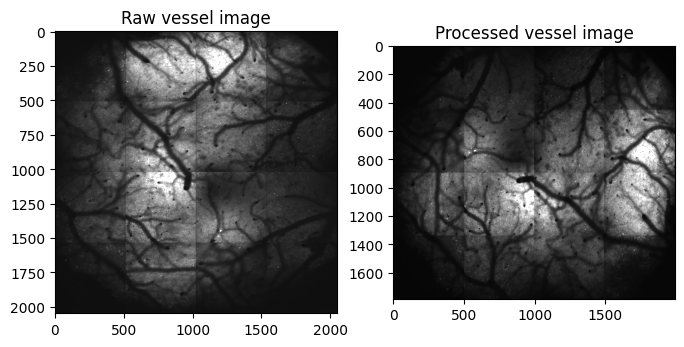

In [67]:
# visualize vessel images
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(vessel_raw, vmax = np.percentile(vessel_raw[:], 99.5), cmap='gray')
ax[0].set(title = 'Raw vessel image')
ax[1].imshow(vessel_processed, vmax = np.percentile(vessel_processed[:], 99.5), cmap='gray')
ax[1].set(title = 'Processed vessel image');

### Whole window AAVretro label images

We also took the overview images of the AAVretro labeling for mTagBFP2 and mScarlet for each cortical layer (L2, L3, L5) under the two-photon microscope with stiching FOVs. Same as the vessel image, there are both the raw images and processed images.

**Note that the mTagBFP2 labeling images in L5 were mostly beedthrough signals from the GCaMP; we barely saw any real blue fluorecent signals in L5. Therefore, L5 neurons were always considered not labeled and we are not showing those images below.**

In [68]:
# view content of whole_window_mTagBFP2_img_2p
nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']

whole_window_mTagBFP2_img_2p pynwb.base.Images at 0x2172802212304
Fields:
  description: raw and processed mTagBFP2 images for the whole window with stitching FOVs under 2P microscope
  images: {
    processed_whole_window_mTagBFP2_img_L2 <class 'pynwb.image.GrayscaleImage'>,
    processed_whole_window_mTagBFP2_img_L3 <class 'pynwb.image.GrayscaleImage'>,
    processed_whole_window_mTagBFP2_img_L5 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mTagBFP2_img_L2 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mTagBFP2_img_L3 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mTagBFP2_img_L5 <class 'pynwb.image.GrayscaleImage'>
  }

In [69]:
# extract images for mTagBFP2 labeling
mTagBFP2_L2_raw = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['raw_whole_window_mTagBFP2_img_L2'].data[:]
mTagBFP2_L3_raw = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['raw_whole_window_mTagBFP2_img_L3'].data[:]
mTagBFP2_L2_processed = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['processed_whole_window_mTagBFP2_img_L2'].data[:]
mTagBFP2_L3_processed = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['processed_whole_window_mTagBFP2_img_L3'].data[:]


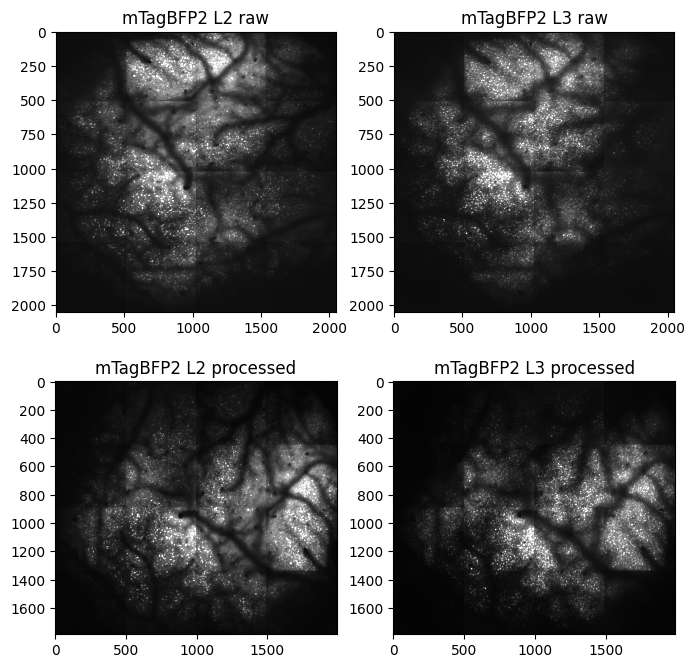

In [70]:
# visualize mTagBFP2 labeling images
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(mTagBFP2_L2_raw, vmax = np.percentile(mTagBFP2_L2_raw[:], 99.5), cmap='gray')
ax[0,0].set(title = 'mTagBFP2 L2 raw')
ax[0,1].imshow(mTagBFP2_L3_raw, vmax = np.percentile(mTagBFP2_L3_raw[:], 99.5), cmap='gray')
ax[0,1].set(title = 'mTagBFP2 L3 raw')
ax[1,0].imshow(mTagBFP2_L2_processed, vmax = np.percentile(mTagBFP2_L2_processed[:], 99.5), cmap='gray')
ax[1,0].set(title = 'mTagBFP2 L2 processed')
ax[1,1].imshow(mTagBFP2_L3_processed, vmax = np.percentile(mTagBFP2_L3_processed[:], 99.5), cmap='gray')
ax[1,1].set(title = 'mTagBFP2 L3 processed');

In [71]:
# view content of whole_window_mScarlet_img_2p
nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']

whole_window_mScarlet_img_2p pynwb.base.Images at 0x2172802210640
Fields:
  description: raw and processed mScarlet images for the whole window with stitching FOVs under 2P microscope
  images: {
    processed_whole_window_mScarlet_img_L2 <class 'pynwb.image.GrayscaleImage'>,
    processed_whole_window_mScarlet_img_L3 <class 'pynwb.image.GrayscaleImage'>,
    processed_whole_window_mScarlet_img_L5 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mScarlet_img_L2 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mScarlet_img_L3 <class 'pynwb.image.GrayscaleImage'>,
    raw_whole_window_mScarlet_img_L5 <class 'pynwb.image.GrayscaleImage'>
  }

In [72]:
# extract images for mScarlet labeling
mScarlet_L2_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L2'].data[:]
mScarlet_L3_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L3'].data[:]
mScarlet_L5_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L5'].data[:]
mScarlet_L2_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L2'].data[:]
mScarlet_L3_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L3'].data[:]
mScarlet_L5_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L5'].data[:]

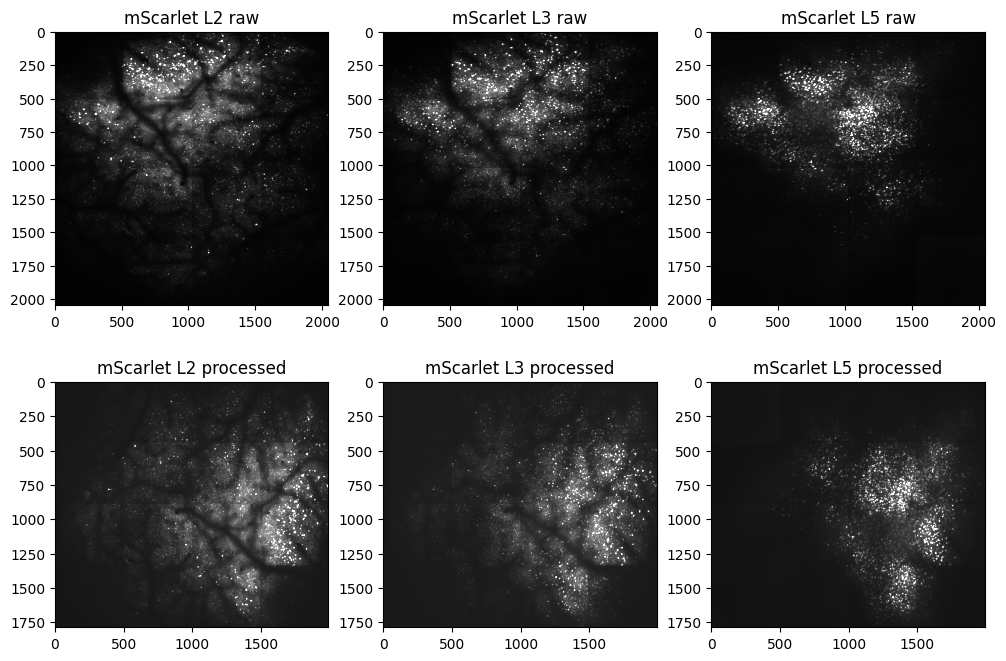

In [73]:
# visualize mTagBFP2 labeling images
fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].imshow(mScarlet_L2_raw, vmax = np.percentile(mScarlet_L2_raw[:], 99.5), cmap='gray')
ax[0,0].set(title = 'mScarlet L2 raw')
ax[0,1].imshow(mScarlet_L3_raw, vmax = np.percentile(mScarlet_L3_raw[:], 99.5), cmap='gray')
ax[0,1].set(title = 'mScarlet L3 raw')
ax[0,2].imshow(mScarlet_L5_raw, vmax = np.percentile(mScarlet_L5_raw[:], 99.5), cmap='gray')
ax[0,2].set(title = 'mScarlet L5 raw')
ax[1,0].imshow(mScarlet_L2_processed, vmax = np.percentile(mScarlet_L2_processed[:], 99.5), cmap='gray')
ax[1,0].set(title = 'mScarlet L2 processed')
ax[1,1].imshow(mScarlet_L3_processed, vmax = np.percentile(mScarlet_L3_processed[:], 99.5), cmap='gray')
ax[1,1].set(title = 'mScarlet L3 processed')
ax[1,2].imshow(mScarlet_L5_processed, vmax = np.percentile(mScarlet_L5_processed[:], 99.5), cmap='gray')
ax[1,2].set(title = 'mScarlet L5 processed');

###  Widefield retinotopy

The `retinotopy` processing module contains the results of the widefield images of this mouse, including:
- **axis_1_phase_map_altitude**: axis 1 (altitude) phase map in degree
- **axis_2_phase_map_azimuth**: axis 2 (azimuth) phase map in degree
- **field_sign_map**: the field sign map
- **power_map_avg**: average FFT power map (for the stimuli of 4 cordinal directions)
- **widefield_vessel_image**: structural image of vessel pattern at brain surface for the whole window; x axis is ~lateral (left) to medial (right), y axis is ~posterior to anterior, same as the "processed" vessel image and AAVretro label images under 2P microscope.

In [74]:
# view content of widefield retinotopy
nwb_retino.processing['retinotopy']['widefield_imaging']

widefield_imaging pynwb.base.Images at 0x2172802205712
Fields:
  description: results of widefield imaging in this mouse. Use the Registration__wf_to_rs_mm_transformation_matrix in lab_meta_data to algin the WF images to the resize/processed images.
  images: {
    axis_1_phase_map_altitude <class 'pynwb.image.GrayscaleImage'>,
    axis_2_phase_map_azimuth <class 'pynwb.image.GrayscaleImage'>,
    field_sign_map <class 'pynwb.image.GrayscaleImage'>,
    power_map_avg <class 'pynwb.image.GrayscaleImage'>,
    widefield_vessel_image <class 'pynwb.image.GrayscaleImage'>
  }

In [75]:
# extract widefield imaging results
axis_1_phase_map_altitude = nwb_retino.processing['retinotopy']['widefield_imaging']['axis_1_phase_map_altitude'].data[:]
axis_2_phase_map_azimuth = nwb_retino.processing['retinotopy']['widefield_imaging']['axis_2_phase_map_azimuth'].data[:]
field_sign_map = nwb_retino.processing['retinotopy']['widefield_imaging']['field_sign_map'].data[:]
power_map_avg = nwb_retino.processing['retinotopy']['widefield_imaging']['power_map_avg'].data[:]
widefield_vessel_image = nwb_retino.processing['retinotopy']['widefield_imaging']['widefield_vessel_image'].data[:]

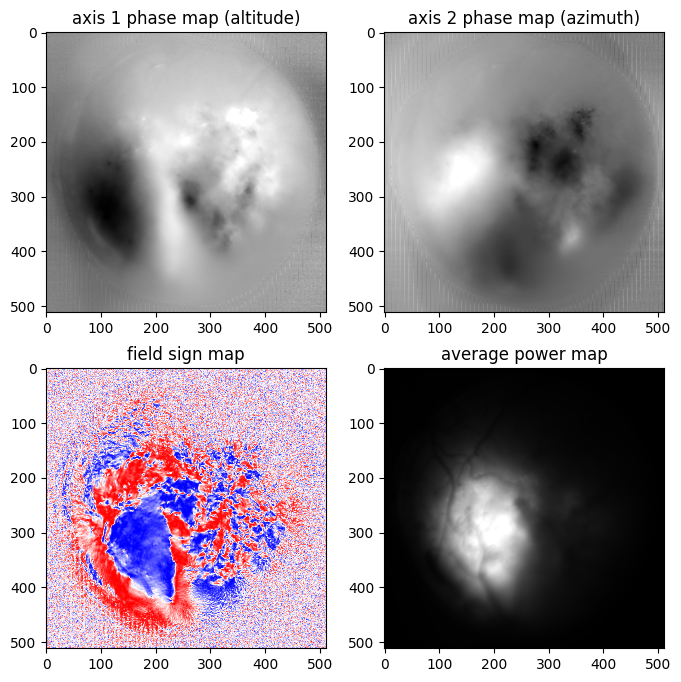

In [76]:
# visualize widefield retinotopy results
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(axis_1_phase_map_altitude, vmax = np.percentile(axis_1_phase_map_altitude[:], 99.5), cmap='gray')
ax[0,0].set(title = 'axis 1 phase map (altitude)')
ax[0,1].imshow(axis_2_phase_map_azimuth, vmax = np.percentile(axis_2_phase_map_azimuth[:], 99.5), cmap='gray')
ax[0,1].set(title = 'axis 2 phase map (azimuth)')
ax[1,0].imshow(field_sign_map, vmin = -np.percentile(np.abs(field_sign_map[:]), 99.5),vmax = np.percentile(np.abs(field_sign_map[:]), 99.5), cmap='bwr')
ax[1,0].set(title = 'field sign map')
ax[1,1].imshow(power_map_avg, vmax = np.percentile(power_map_avg[:], 99.5), cmap='gray')
ax[1,1].set(title = 'average power map');

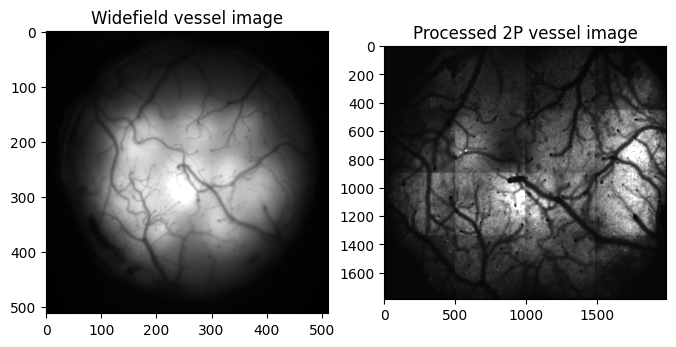

In [77]:
# visualize vessel images
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(widefield_vessel_image, vmax = np.percentile(widefield_vessel_image[:], 99.5), cmap='gray')
ax[0].set(title = 'Widefield vessel image')
ax[1].imshow(vessel_processed, vmax = np.percentile(vessel_processed[:], 99.5), cmap='gray')
ax[1].set(title = 'Processed 2P vessel image');

### Mouse-specific lab meta data

You can find other information about this mouse in the mouse-specific `lab_meta_data`.

In **AAVretroInjSite**, you can find where the AAVretro for mScarlet and mTagBFP2 were injected to for this mice. This is the same as `lab_meta_data` for individual sessions.

In **Registration**, you can find information about registration of the cranial window to Allen CCF.
- **window_center_ml_ccf_mm**: cranial window center location along ML axis in CCF (mm from bregma)
- **window_center_AP_ccf_mm**: cranial window center location along AP axis in CCF (mm from bregma)
- **vessel_2p_center_ml_ccf_mm**: center location of the processed whole window vessel 2P image along ML axis in CCF (mm from bregma)
- **vessel_2p_center_ap_ccf_mm**: center location of the processed whole window vessel 2P image along AP axis in CCF (mm from bregma)
- **rs_to_ccf_mm_transformation_matrix**: transformation matrix for transforming the processed whole window vessel 2P image to CCF coordinate (mm from bregma)
- **wf_to_rs_transformation_matrix**: transformation matrix for transforming widefield images to the processed whole window vessel 2P image

In [78]:
# view mouse-specific lab meta data
nwb_retino.lab_meta_data['harvey_lab_swac_metadata_mouse']

harvey_lab_swac_metadata_mouse abc.LabMetaDataMouse at 0x2172802690128
Fields:
  AAVretroInjSite__mScarlet: OFC
  AAVretroInjSite__mTagBFP2: posterior_ACC_M2
  Registration__rs_to_ccf_mm_transformation_matrix: [[ 9.70593818e-03  1.07922000e-03 -3.65309607e+00]
 [ 1.05363817e-03 -9.94159365e-03 -1.04416105e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
  Registration__vessel_2p_center_ap_ccf_mm: -2.2282304706965554
  Registration__vessel_2p_center_ml_ccf_mm: -2.0515106477736613
  Registration__wf_to_rs_transformation_matrix: [[   4.96046511    0.80476935 -491.21996699]
 [  -0.80476935    4.96046511  -85.01253155]
 [   0.            0.            1.        ]]
  Registration__window_center_ap_ccf_mm: -2.301120456746481
  Registration__window_center_ml_ccf_mm: -1.9980849780552776